In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('lending_club_loan_two.csv')

# Exploratory Data Analysis

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

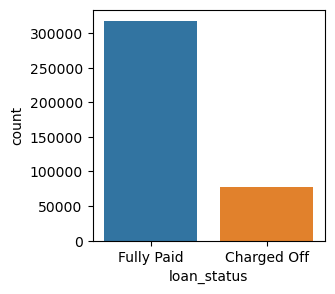

In [7]:
plt.figure(figsize=(3,3))
sns.countplot(x=df['loan_status'], data=df)

<Axes: xlabel='loan_amnt', ylabel='Count'>

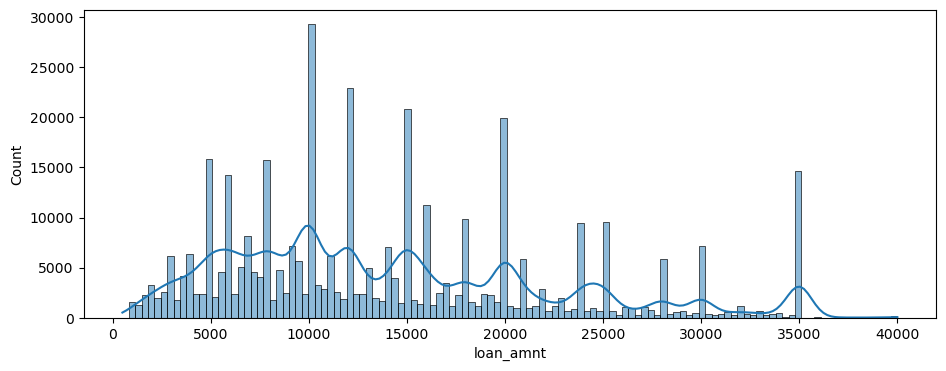

In [8]:
plt.figure(figsize=(11,4))
sns.histplot(x='loan_amnt', data=df,kde=True)

In [9]:
df.corr(numeric_only=True)['loan_amnt'].sort_values()

pub_rec_bankruptcies   -0.106539
pub_rec                -0.077779
dti                     0.016636
revol_util              0.099911
int_rate                0.168921
open_acc                0.198556
mort_acc                0.222315
total_acc               0.223886
revol_bal               0.328320
annual_inc              0.336887
installment             0.953929
loan_amnt               1.000000
Name: loan_amnt, dtype: float64

<Axes: >

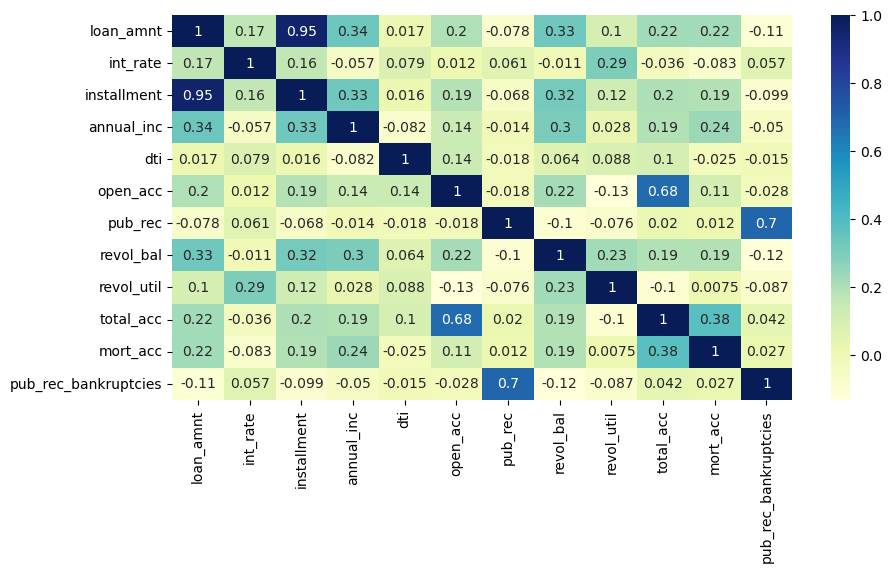

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='YlGnBu')

In [11]:
Unique_grades = sorted(df['grade'].unique())
Unique_grades

['A', 'B', 'C', 'D', 'E', 'F', 'G']

<Axes: xlabel='grade', ylabel='count'>

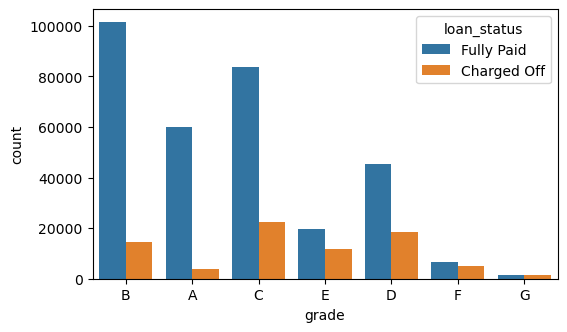

In [12]:
plt.figure(figsize=(6,3.5))
sns.countplot(x='grade',data=df,hue='loan_status')

In [13]:
unique_subgrade = sorted(df['sub_grade'].unique())

<Axes: xlabel='sub_grade', ylabel='count'>

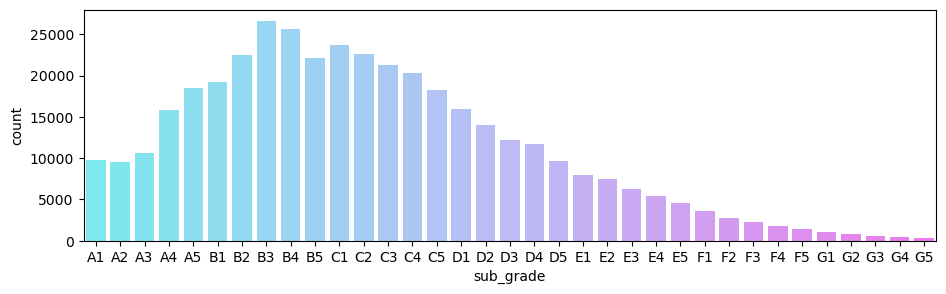

In [14]:
plt.figure(figsize=(11,3))
sns.countplot(x='sub_grade',data=df, palette='cool',alpha = 0.6, order=unique_subgrade)

<Axes: xlabel='sub_grade', ylabel='count'>

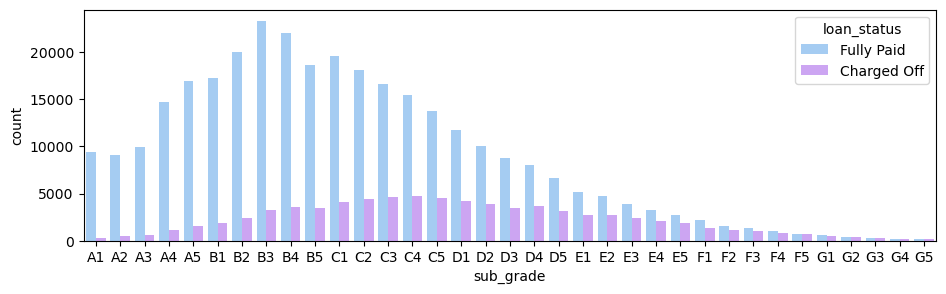

In [15]:
plt.figure(figsize=(11,3))
sns.countplot(x='sub_grade',data=df, palette='cool',alpha = 0.6, order=unique_subgrade, hue='loan_status')

In [16]:
f_and_g_subgrades = unique_subgrade[-10:]

<Axes: xlabel='sub_grade', ylabel='count'>

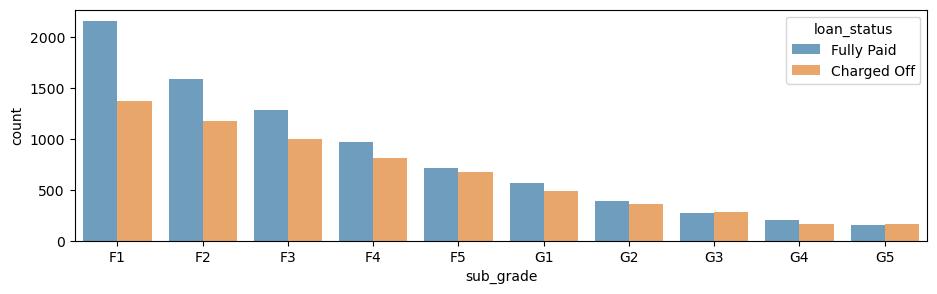

In [17]:
plt.figure(figsize=(11,3))
sns.countplot(x='sub_grade',data=df,alpha = 0.7, order=f_and_g_subgrades, hue='loan_status')

In [18]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off': 0})

In [19]:
df[['loan_repaid','loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


<Axes: >

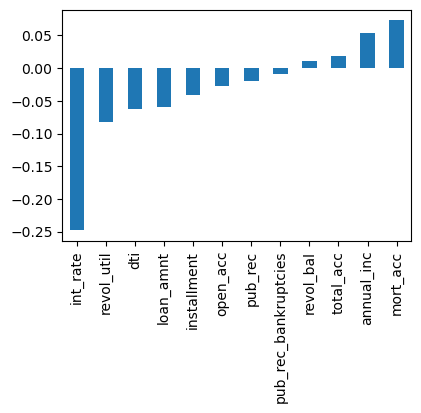

In [20]:
plt.figure(figsize=(4.5,3))
df.corr(numeric_only=True)['loan_repaid'][:-1].sort_values().plot(kind = 'bar')

# Data Preprocessing

In [21]:
len(df)

396030

In [22]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [23]:
df = df.drop('emp_title', axis=1)

In [24]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [25]:
emp_len_list = ['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

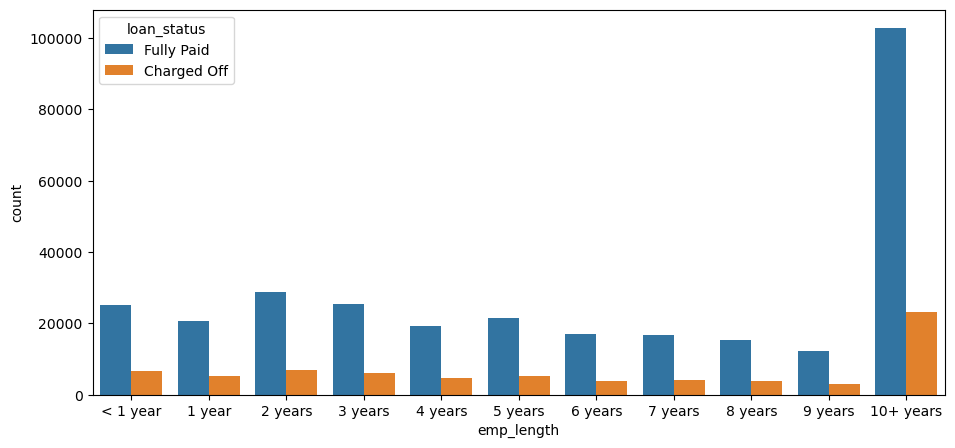

In [26]:
plt.figure(figsize=(11,5))
sns.countplot(x='emp_length', data=df, order=emp_len_list, hue='loan_status')

In [27]:
#It looks like the percentage of people in all categories who fully paid or charged off is kind 
#of same in all the 'emp_length' , so this feature is not providing that much insights, 
#Still lets check it statistically also

In [28]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [29]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [30]:
emp_co/(emp_fp+emp_co) #Percentage of people that charged off

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

In [31]:
df = df.drop('emp_length', axis = 1)

In [32]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [33]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [34]:
df = df.drop('title', axis = 1)

In [35]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

<Axes: >

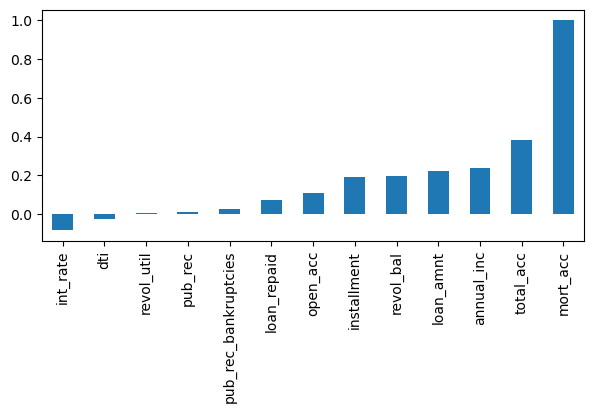

In [36]:
plt.figure(figsize=(7,3))
df.corr(numeric_only=True)['mort_acc'].sort_values().plot(kind='bar')

In [37]:
total_acc_avg = df.groupby('total_acc').mean(numeric_only=True)['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [38]:
def fill_mort(t_acc, m_acc):
    if np.isnan(m_acc):
        return total_acc_avg[t_acc]
    else:
        return m_acc

In [39]:
df['mort_acc']=df.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']),axis=1)

In [40]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [41]:
df = df.dropna()

In [42]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and dummy variables

In [43]:
non_numeric_featues = [col for col in df.columns if df[col].dtype == 'object']
non_numeric_featues

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [44]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [45]:
print(df['term'].unique())

[' 36 months' ' 60 months']


In [46]:
df['term'] = df['term'].map({' 36 months':36,' 60 months':60})

In [47]:
df['term'].head(10)

0    36
1    36
2    36
3    36
4    60
5    36
6    36
7    36
8    60
9    36
Name: term, dtype: int64

In [48]:
print(sorted(df['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [49]:
#We know that grade is a part of sub-grade so we can drop it
df = df.drop('grade', axis=1)

In [50]:
print(sorted(df['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [51]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

df = pd.concat([df.drop('sub_grade',axis=1),dummies], axis=1)

In [52]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [53]:
#df['verification_status'].value_counts()
#df['application_type'].value_counts()
#df['initial_list_status'].value_counts()
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [54]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies], axis=1)

In [55]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [56]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [57]:
#We will merge the NONE and ANY category into OTHER
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [58]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df.drop('home_ownership',axis=1),dummies], axis=1)

In [59]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

In [60]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [61]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [62]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)

df = pd.concat([df.drop('zip_code',axis=1),dummies], axis=1)

In [63]:
df = df.drop('address', axis=1)

In [64]:
#we wouldn't know beforehand whether or not a loan would be issued when using our model, 
#so in theory we wouldn't have an issue_date, so we will drop this feature.

df = df.drop('issue_d',axis=1)

In [65]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [66]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

In [67]:
len(df.columns)

80

## Train test split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
df = df.drop('loan_status',axis=1) #as loan_status and loan_repaid share same info

In [70]:
x = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

## Normalizing

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
x_train = scaler.fit_transform(x_train)

In [75]:
x_test = scaler.transform(x_test)

## Creating the model

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [77]:
x_train.shape

(316175, 78)

In [78]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [79]:
model.fit(x=x_train, y=y_train, epochs=25 ,batch_size=256, validation_data=(x_test,y_test))

Epoch 1/25
   1/1236 [..............................] - ETA: 3:39 - loss: 0.7726

2023-09-09 21:42:40.570835: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1236/1236 [==============================] - 1s 957us/step - loss: 0.3022 - val_loss: 0.2647
Epoch 2/25
1236/1236 [==============================] - 1s 927us/step - loss: 0.2656 - val_loss: 0.2639
Epoch 3/25
1236/1236 [==============================] - 1s 883us/step - loss: 0.2631 - val_loss: 0.2626
Epoch 4/25
1236/1236 [==============================] - 1s 914us/step - loss: 0.2620 - val_loss: 0.2624
Epoch 5/25
1236/1236 [==============================] - 1s 890us/step - loss: 0.2611 - val_loss: 0.2621
Epoch 6/25
1236/1236 [==============================] - 1s 880us/step - loss: 0.2604 - val_loss: 0.2622
Epoch 7/25
1236/1236 [==============================] - 1s 907us/step - loss: 0.2601 - val_loss: 0.2617
Epoch 8/25
1236/1236 [==============================] - 1s 885us/step - loss: 0.2596 - val_loss: 0.2615
Epoch 9/25
1236/1236 [==============================] - 1s 880us/step - loss: 0.2593 - val_loss: 0.2615
Epoch 10/25
1236/1236 [==============================] - 1s 906us/step - lo

## Evaluating

In [80]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

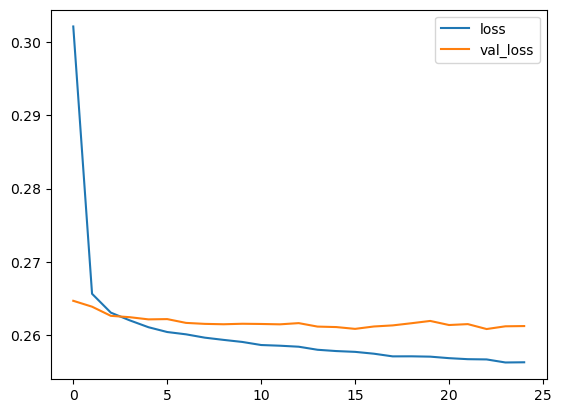

In [81]:
loss_df.plot()

In [82]:
from sklearn import metrics

In [83]:
predictions = model.predict(x_test)

2471/2471 [==============================] - 0s 179us/step


In [85]:
binary_predictions = (predictions > 0.5).astype("int32")
# (predictions > 0.5) creates a Boolean array, where entries with 
# values greater than 0.5 become True (indicating class 1), and others become False (indicating class 0).

# .astype("int32") then converts this Boolean array into integers. In Python, True becomes 1 
# and False becomes 0 when cast to integers.

In [86]:
binary_predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [88]:
print(metrics.classification_report(y_test, binary_predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

